## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morph
from skimage import filters
from scipy import ndimage
%matplotlib inline

# Exercise 1: The Histogram

Open the image "comp_noise.png" and show it

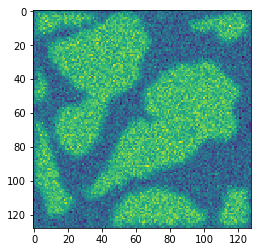

In [2]:
img=plt.imread('comp_noise.png')

plt.imshow(img)

The histogram is created by [https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.histogram.html](numpy.histogram)

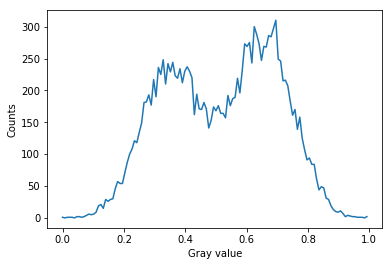

In [3]:
hist,axis = np.histogram(img,bins=128)
plt.plot(axis[0:-1],hist)
plt.xlabel('Gray value')
plt.ylabel('Counts')

You can apply a threshold by computing the expression $bimg=>th$, where th is the threshold.

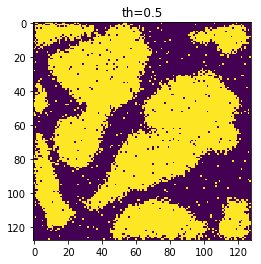

In [4]:
bimg=0.5<img
plt.imshow(bimg)
plt.title('th=0.5')

# Now, create two subplots with images where the thresholds are placed on
the first and second histogram peaks. Add the previous image segmented between the peaks. 

Q1.1: What is your conclusion about the thresholds at the three positions in the histogram?

In [1]:
# your code

### Answer: 
...

# Exercise 2: Explore thresholding methods
Use the same image as in the previous exercise. SciKit Image provides many thresholding methods http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html.

One is the Otsu threshold. To segment an image you perform the following steps.

The threshold according to 0.509765625


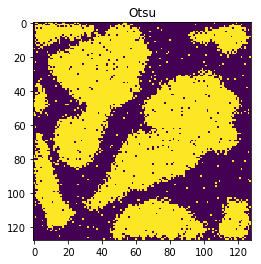

In [6]:
otsu = filters.threshold_otsu(img)
print('The threshold according to',otsu)
plt.imshow(otsu<img)
plt.title('Otsu')

Using the try_all_threshold function you can evaluate the performance of different available thresholding methods. See example in the documentation. 

Q2.1: Is there any difference? 

Q2.2: Please explain why? Hint, try the function on a more complex image.

In [2]:
#your code

### Answers:
...

# Exercise 3: Threshold based on likelihood ratio

Segment it using the
following hypotheses:
\begin{eqnarray}
H_0 &:& \mathcal{N}(0,1)\nonumber\\
H_1 &:& \mathcal{N}(0,2.5)\nonumber
\end{eqnarray}

Compute the log-likelihood ratio from
$\Lambda(R)=\frac{p_{r|H_1}(R|H_1)}{p_{r|H_0}(R|H_0)}=\gamma$
with
\begin{eqnarray}
p_{r|H_0}(R|H_0)&=& \prod_{i=1}^{N}\frac{1}{\sqrt{2\,\pi}\sigma_0}\exp{\frac{{R_i}^2}{2\,{\sigma_0}^2}}\nonumber\\
p_{r|H_1}(R|H_1)&=&\prod_{i=1}^{N}\frac{1}{\sqrt{2\,\pi}\sigma_1}\exp{\frac{{R_i}^2}{2\,{\sigma_1}^2}}
\nonumber
\end{eqnarray}

The evaluation of the likelihood ratio is found in van Trees p. 29 (included PDF). From this evaluation it is given that
1. The local sum of squares ($l(R)=\sum_{i=1}^{N} R_i^2 $) is our sufficient statistic
2. The threshold is $l(R) \lessgtr \frac{2\sigma_0^2 \sigma_1^2}{\sigma_1^2 - \sigma_0^2} \left(N \ln\frac{\sigma_0}{\sigma_1}-\ln \eta\right)=\gamma$


$h_{N\times N}$ is box filter with all weights =1 and $f_{median}$ is median filtered with $N\times N$.

First, we need some data. 

- Use the Bi-level image of the grains and set the pore space distribution to $\mathcal{N}(0,2.5)$ and the grain distribution to $\mathcal{N}(0,1)$. Hint: Multiply the bilevel image by a Gaussian noise image for the grains. Multiply by (1-bimg) for the pores.
- Display the image
- Compute and plot the histogram

Q3.1: What is you conclusion about the histogram?

Q3.2: Apply an Otsu threshold to the image. What happens?

In [3]:
# Your code


### Answer:
...

Verify if it makes sense to use the sufficient statistic. 
- Filter the image intensity values squared, try N=5 and N=7
- Apply a uniform filter (kernel size NxN with all elements = 1) 

Q3.3: What happens with increasing N?

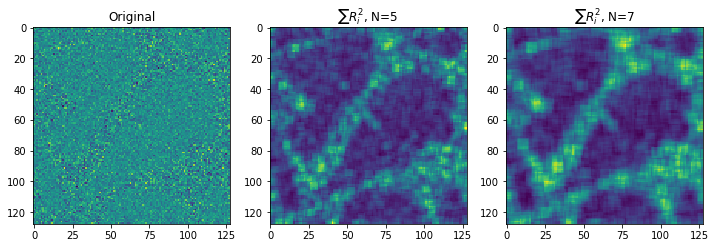

In [25]:
plt.figure(figsize=[12,7])
plt.subplot(1,3,1)
plt.imshow(simg)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(ndimage.uniform_filter(simg**2,5))
plt.title("$\sum R_i^2$, N=5")

plt.subplot(1,3,3)
plt.imshow(ndimage.uniform_filter(simg**2,7))
plt.title("$\sum R_i^2$, N=7")



### Answer:
...

Now define a function for the likelihood ratio...

In [29]:
def LikelihoodRatio(img,s0,s1,N,eta) :
    # your code
    return res

Test your function with different values of N=5,7 and $\eta$=0.001,0.01,0.1

Q3.4 What is the effect of N

Q3.5 What is the effect of $\eta$


In [4]:
# Your code

### Answer
...